In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

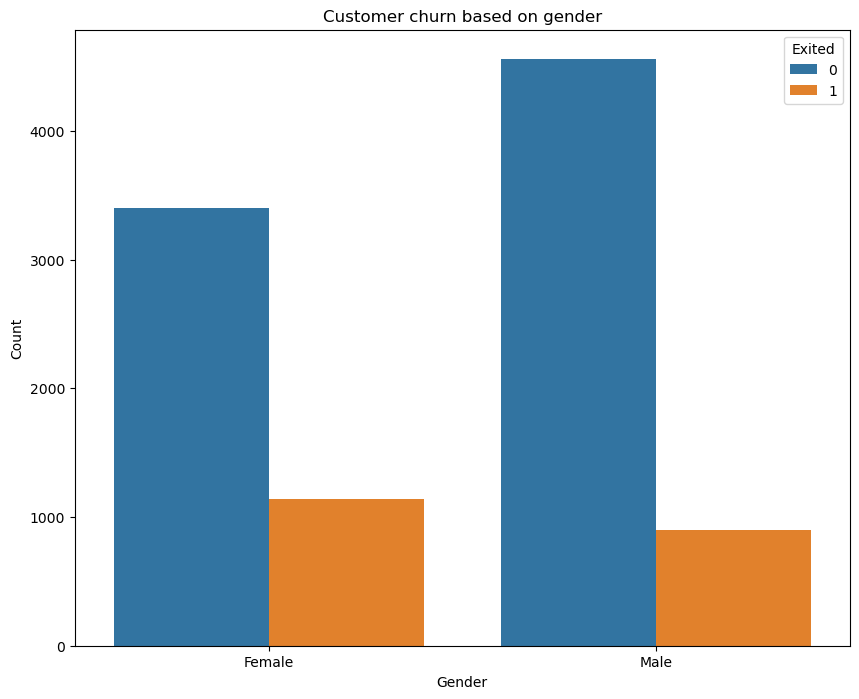

In [8]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender',data=data,hue='Exited')
plt.title('Customer churn based on gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

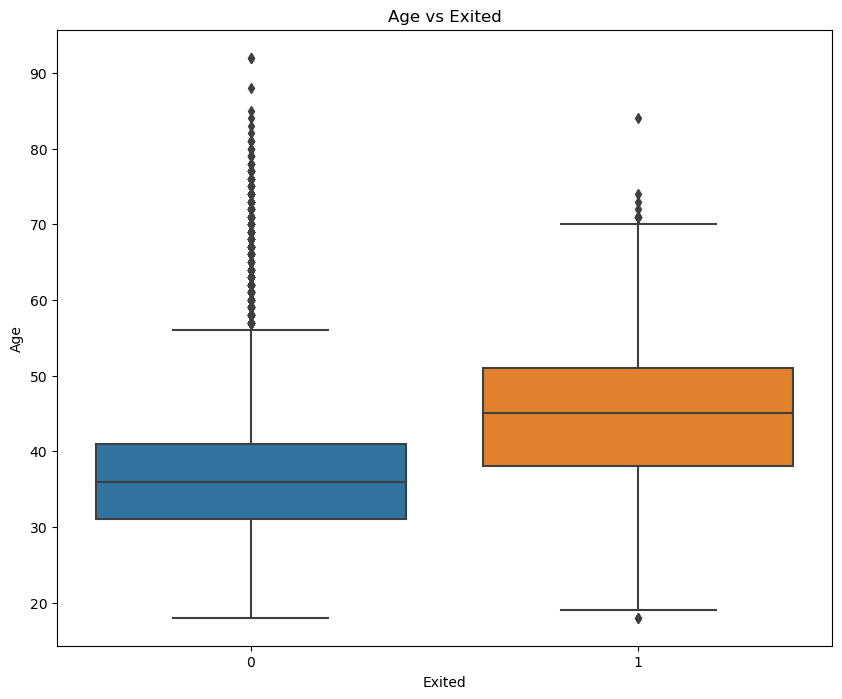

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age vs Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

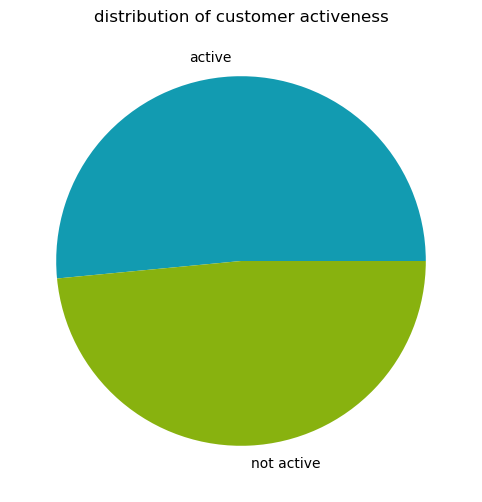

In [10]:
distributionofactiveness=data['IsActiveMember'].value_counts()
colors = ['#129BB1', '#88B20F']
plt.figure(figsize=(8, 6))
plt.pie(distributionofactiveness,labels=['active','not active'],colors=colors)
plt.title('distribution of customer activeness')
plt.show()

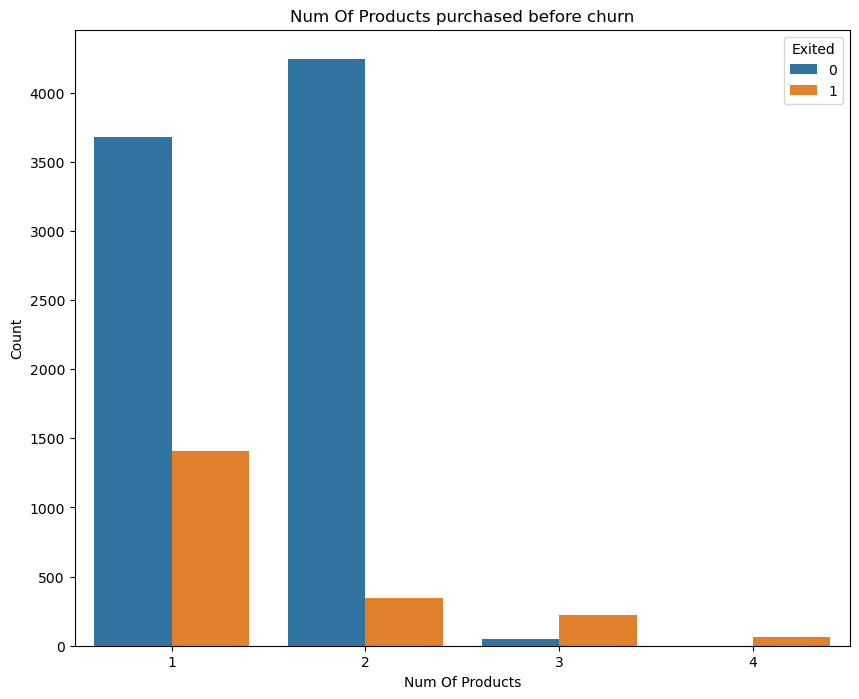

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x='NumOfProducts',data=data,hue='Exited')
plt.title('Num Of Products purchased before churn')
plt.xlabel('Num Of Products')
plt.ylabel('Count')
plt.show()


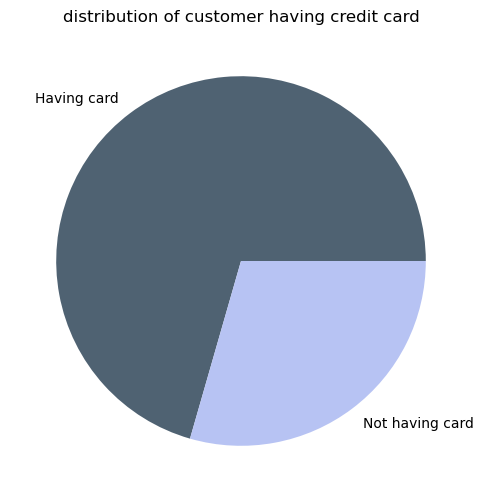

In [12]:
distributionofcr=data['HasCrCard'].value_counts()
colors = ['#4F6272', '#B7C3F3']
plt.figure(figsize=(8, 6))
plt.pie(distributionofcr,labels=['Having card','Not having card'],colors=colors)
plt.title('distribution of customer having credit card')
plt.show()

In [13]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Geography']=le.fit_transform(data['Geography'])

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
x=data.drop(columns='Exited') # droping coulmn from the feature 
y=data['Exited']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=42)

In [20]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [21]:
classifier.score(x_train,y_train)

0.7869333333333334

In [22]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [24]:
print(confusion_matrix(y_test,y_pred))

[[1958   45]
 [ 455   42]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500



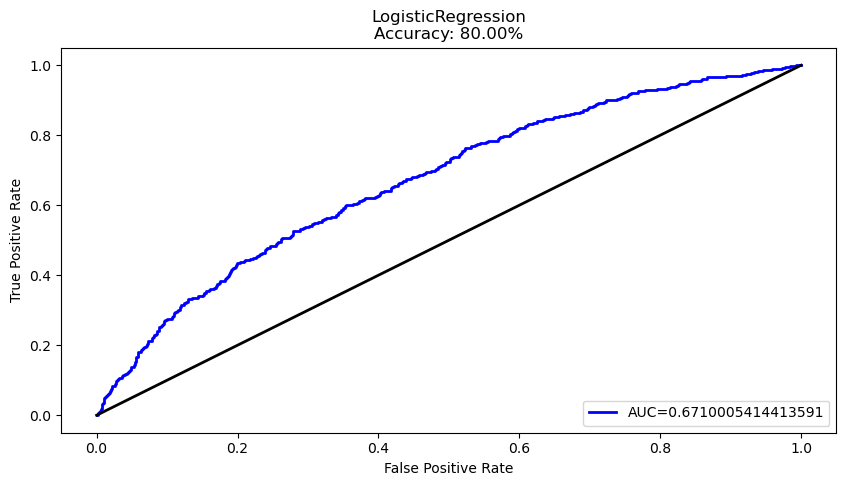

In [26]:
y_prob = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test,y_prob)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('LogisticRegression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [27]:
classifier1 = RandomForestClassifier()
classifier1.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
classifier1.score(x_train,y_train)

1.0

In [29]:
y_pred = classifier1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.866

In [31]:
print(confusion_matrix(y_test,y_pred))

[[1933   70]
 [ 265  232]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



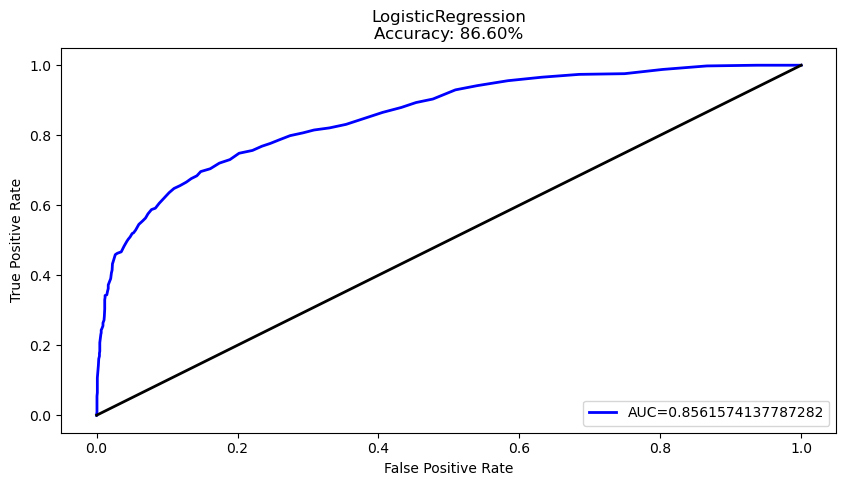

In [33]:
y_prob1 = classifier1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
auc = roc_auc_score(y_test,y_prob1)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('LogisticRegression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()

In [34]:
classifier2 = GradientBoostingClassifier()
classifier2.fit(x_train,y_train)

GradientBoostingClassifier()

In [35]:
classifier2.score(x_train,y_train)

0.8701333333333333

In [36]:
y_pred = classifier2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.868

In [38]:
print(confusion_matrix(y_test,y_pred))

[[1942   61]
 [ 269  228]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.79      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



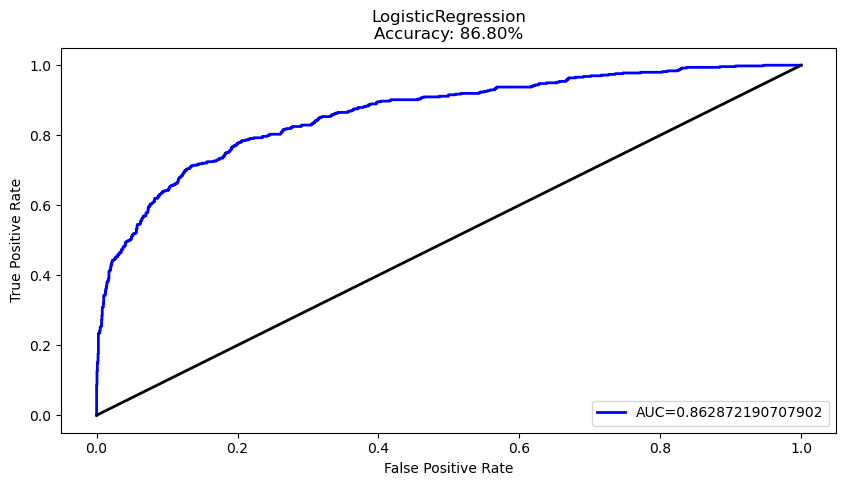

In [40]:
y_prob1 = classifier2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
auc = roc_auc_score(y_test,y_prob1)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('LogisticRegression\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.show()